# 1. MNIST digit image

In [1]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [2]:
print(x_train.shape, y_train.shape, sep='\n')
print(y_train)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]


In [3]:
print(x_test.shape, y_test.shape, sep='\n')
print(y_test)

(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


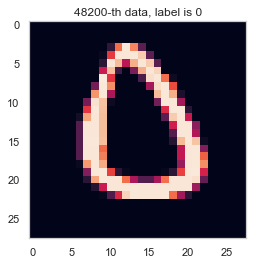

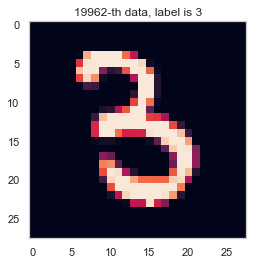

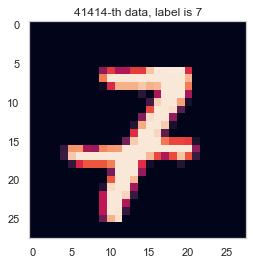

In [9]:
%matplotlib inline
sample_size = 3

random_idx = np.random.randint(60000, size=sample_size)

for idx in random_idx:
    img = x_train[idx]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.grid(False)
    plt.title("%d-th data, label is %d" % (idx, label))

In [10]:
# valid dataset
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)
print(f'훈련 데이터 {x_train.shape}, 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape}, 레이블 {y_val.shape}')      

훈련 데이터 (42000, 28, 28), 레이블 (42000,)
검증 데이터 (18000, 28, 28), 레이블 (18000,)


In [12]:
# 입력을 위해 input reshape + normalization
x_train = (x_train.reshape(-1, 28*28))/255
x_val = (x_val.reshape(-1, 28*28))/255
x_test = (x_test.reshape(-1, 28*28))/255

print(x_train.shape)

(42000, 784)


In [13]:
# label -> one-hot encoding
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**1. model 구성**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

**2. compile(학습과정 설정)**

In [17]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['acc'])

**3. training**

- history 객체 활용

In [ ]:
history = model.fit(x_train,y_train,epochs=30,batch_size=128,validation_data=(x_val, y_val))